# Import Library

Mengimpor dan menginstal library dan modul yang akan digunakan

In [1]:
!pip install -q matplotlib=='3.5.2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 33.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.2 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.2 which is incompatible.


In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
from google.colab import drive

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


# Import Data from Drive

Menghubungkan Google Colab dengan Google Drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Mengakses dataset Breast Cancer yang sudah terbagi menjadi 3 kelas ada di Google Drive

In [5]:
dataset = '/content/drive/MyDrive/Dataset/Breast Cancer Dataset'
os.listdir(dataset)

['normal', 'benign', 'malignant']

# Eksplorasi Data

Eksplorasi data (data exploration) adalah langkah awal dalam analisis data yang bertujuan untuk memahami struktur, karakteristik, dan hubungan dalam dataset. Dengan melakukan eksplorasi data, dapat mengetahui jumlah direktori dan jumlah total data adalah bagian dari memahami dan memverifikasi dataset. Khususnya dalam konteks Google Drive dan Google Colab, langkah ini dilakukan untuk memastikan bahwa data yang ada di Google Drive sesuai dengan data yang terbaca di Google Colab.

In [6]:
list = []
totalFile = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFile += 1

print('Jumlah direktori data :', totalDir)
print('Jumlah total data :',totalFile)

Jumlah direktori data : 3
Jumlah total data : 767


In [7]:
index = np.arange(1,4,1)
d = {'Kelas': os.listdir(dataset), 'Total_Gambar': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Kelas,Total_Gambar
1,normal,133
2,benign,424
3,malignant,210


Membuat visualisasi distribusi data per kelas

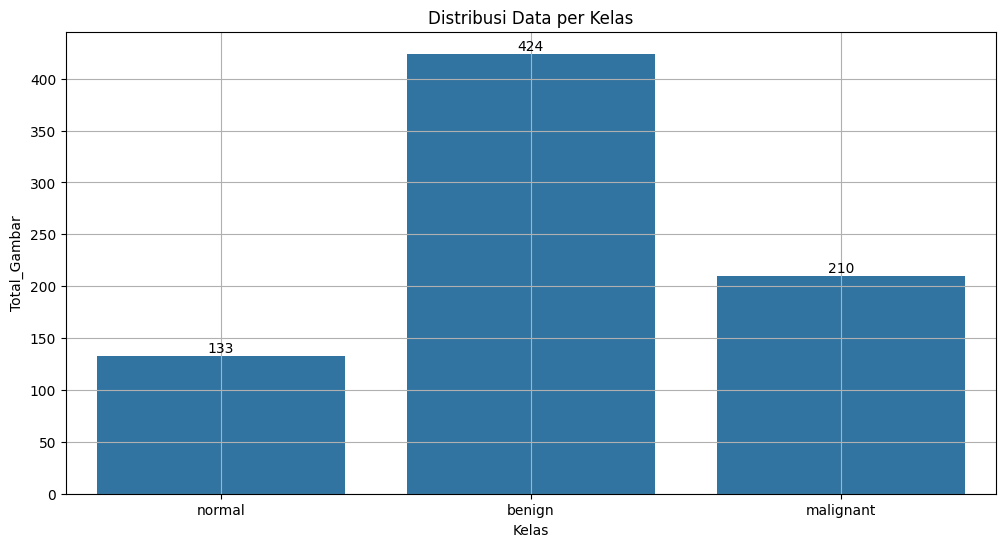

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data1,x='Kelas', y='Total_Gambar')
plt.title('Distribusi Data per Kelas')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [9]:
from tqdm import tqdm

filenames = []
folder = []
image = []
for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]

data2 = pd.DataFrame({'Path Gambar':filenames, 'Kelas':folder, 'Nama Gambar':image})

4it [00:00, 157.36it/s]


In [10]:
extension = []
for i in range (sum(data1['Total_Gambar'])) :
    strValue = data2['Nama Gambar'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [11]:
data2['Ekstensi'] = extension
data2

,Path Gambar,Kelas,Nama Gambar,Ekstensi
0,/content/drive/MyDrive/Dataset/Breast Cancer D...,normal,normal (117).png,.png
1,/content/drive/MyDrive/Dataset/Breast Cancer D...,normal,normal (115).png,.png
2,/content/drive/MyDrive/Dataset/Breast Cancer D...,normal,normal (120).png,.png
3,/content/drive/MyDrive/Dataset/Breast Cancer D...,normal,normal (108).png,.png
4,/content/drive/MyDrive/Dataset/Breast Cancer D...,normal,normal (119).png,.png
...,...,...,...,...
762,/content/drive/MyDrive/Dataset/Breast Cancer D...,malignant,malignant (86).png,.png
763,/content/drive/MyDrive/Dataset/Breast Cancer D...,malignant,malignant (92).png,.png
764,/content/drive/MyDrive/Dataset/Breast Cancer D...,malignant,malignant (96).png,.png
765,/content/drive/MyDrive/Dataset/Breast Cancer D...,malignant,malignant (98).png,.png


In [12]:
data2['Ekstensi'].unique()

array(['.png'], dtype=object)

In [13]:
data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [14]:
from PIL import Image

total_img = 0
usg_payudara = os.path.join(dataset)
list_data_images = ['normal', 'malignant', 'benign']

for data in list_data_images:
  dir = os.path.join(usg_payudara, data)
  total = len(os.listdir(dir))
  print(data+' : ', total)
  total_img = total_img + total

  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    print('-',img.size)
  print('...................')

print('\nTotal Images :', total_img)

normal :  133
- (770, 574)
- (556, 494)
- (772, 578)
- (770, 589)
- (552, 486)
...................
malignant :  210
- (557, 465)
- (591, 464)
- (555, 463)
- (340, 439)
- (555, 488)
...................
benign :  424
- (777, 578)
- (563, 473)
- (766, 585)
- (562, 471)
- (882, 581)
...................

Total Images : 767


Membuat visualisasi untuk contoh breast cancer imaging

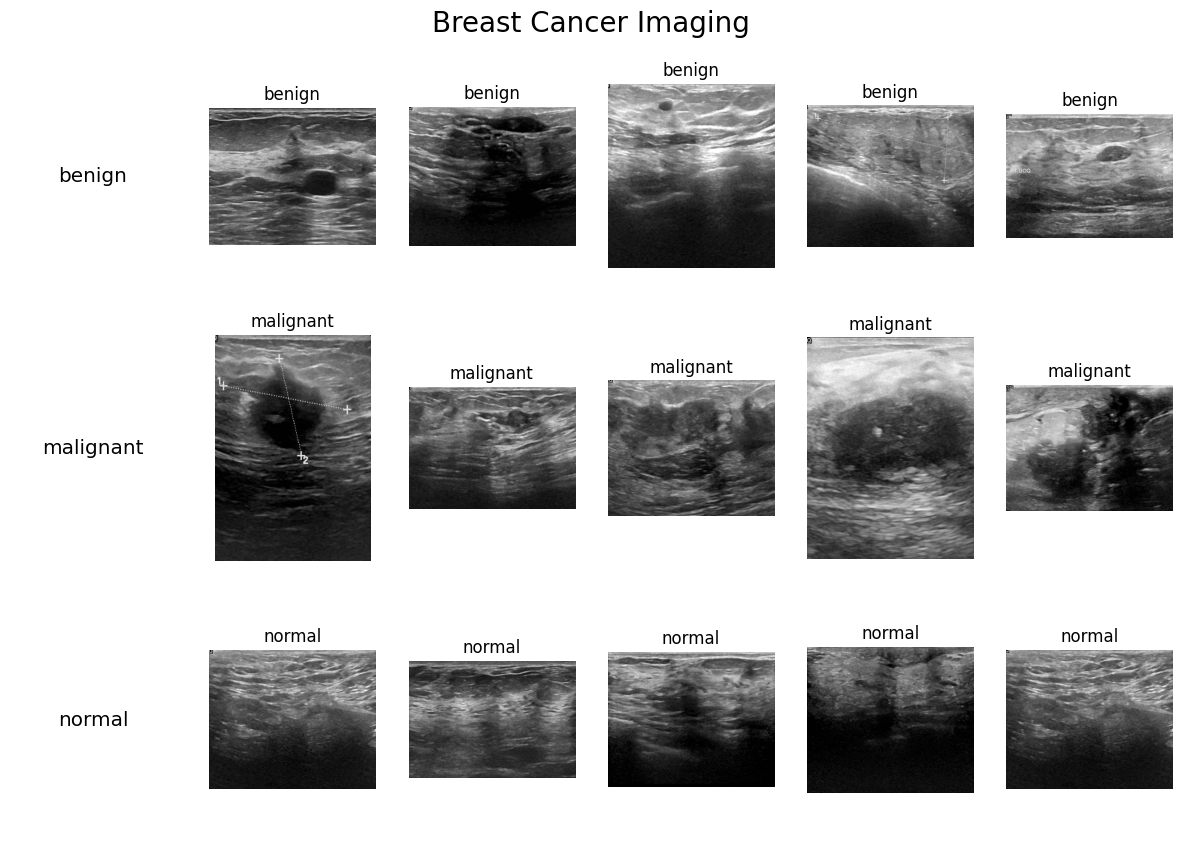

In [15]:
unique_list = []
unique = data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()
fig = plt.figure(figsize=(15,10))
plt.title('Breast Cancer Imaging', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 3
img2show = data2.groupby('Kelas').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Path Gambar'])
        kelas = img2show.iloc[i-1]['Kelas']
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.title(f'{kelas}')
plt.show()
